In [1]:
import cv2
import numpy as np
from PIL import Image
from pathlib import Path
import torch
from config import get_config
# from utils import load_facebank, draw_box_name, prepare_facebank
from arcface_infer import Arcface

In [4]:
zeros = np.zeros((20,20,3), dtype='uint8')

In [5]:
zeros.shape

(20, 20, 3)

In [6]:
pilimg = Image.fromarray(zeros)

In [3]:
arcface = Arcface(use_gpu=False)

ir_se_50 model generated
warming up..
warmed up! 0.346s


In [8]:
e1 = Image.open('/home/dh/Pictures/evan.png').convert('RGB')
eug = Image.open('/home/dh/Pictures/eugene.png').convert('RGB')

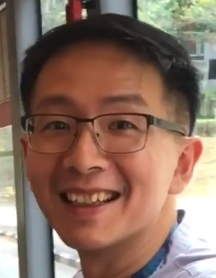

In [9]:
eug

In [10]:
res = arcface.embed(conf, [e1, eug] , tta=True)

In [11]:
len(res)

2

In [12]:
import numpy as np

In [13]:
np.linalg.norm(res[0] - res[1])

1.2870212

In [14]:
from scipy.spatial import distance_matrix
dist_mat = distance_matrix(res, res)

In [15]:
dist_mat.shape

(2, 2)

In [16]:
dist_mat

array([[0.        , 1.28702112],
       [1.28702112, 0.        ]])